In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,History
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef,confusion_matrix

In [6]:
def load_data(data_url):
    print("Loading data ...",end=" ")
    df = pd.read_excel(data_url)
    #df.drop(['V7_day','V6_day'], axis=1, inplace=True)
    X = df.drop("CLASS", axis=1)
    y = df["CLASS"]
    X = X.values
    y = y.values
    print('\033[32m \u2713 \033[0m')
    return X,y

def split_data(X,y):
    print("Split data ...",end=" ")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('\033[32m \u2713 \033[0m')
    return X_train, X_test, y_train, y_test

def save_model(model,name):
    print("Saving "+name+" model ...",end=" ")
    pickle.dump(model, open("./models/"+name+".pkl","wb"))
    print('\033[32m \u2713 \033[0m')

def print_metrics(y_test,y_pred): 
    """n_errors = (y_pred != y_test).sum()
    acc = accuracy_score(y_test, y_pred)
    print("The accuracy is {}".format(acc))
    prec = precision_score(y_test, y_pred)
    print("The precision is {}".format(prec))
    rec = recall_score(y_test, y_pred)
    print("The recall is {}".format(rec))
    f1 = f1_score(y_test, y_pred)
    print("The F1-Score is {}".format(f1))"""
    print("")
    print(classification_report(y_test,y_pred))

def confusion_matr(y_test,y_pred):
    # printing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize =(8, 4))
    sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

def d_tree(X_train, X_test, y_train, y_test):
    print("Creating DT model ...",end=" ")
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    print('\033[32m \u2713 \033[0m')

    y_pred = clf.predict(X_test)
    print_metrics(y_test,y_pred)
    confusion_matr(y_test,y_pred)

    return clf

def r_forest(X_train, X_test, y_train, y_test):
    print("Creating RF model ...",end=" ")
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    print('\033[32m \u2713 \033[0m')

    y_pred = rfc.predict(X_test)
    print(classification_report(y_test,y_pred))
    confusion_matr(y_test,y_pred)
    
    return rfc

def ex_tree(X_train, X_test, y_train, y_test):
    print("Creating Extra_T model ...",end=" ")
    etc = ExtraTreesClassifier(n_estimators=100, max_depth=4)
    etc.fit(X_train, y_train)
    print('\033[32m \u2713 \033[0m')
    y_pred = etc.predict(X_test)
    print_metrics(y_test,y_pred)
    confusion_matr(y_test,y_pred)
    return etc


In [3]:
data_url='C:/Users/KABYADE/Desktop/Fraud_ML/dataset/preprocessing_data.xlsx'
X,y=load_data(data_url)
X_train, X_test, y_train, y_test=split_data(X,y)
X_train.shape,X_test.shape

Loading data ...  ✓ 
Split data ...  ✓ 


((112523, 36), (28131, 36))

Creating Extra_T model ...  ✓ 

              precision    recall  f1-score   support

           0       0.75      0.96      0.84     14113
           1       0.94      0.67      0.78     14018

    accuracy                           0.82     28131
   macro avg       0.84      0.82      0.81     28131
weighted avg       0.84      0.82      0.81     28131



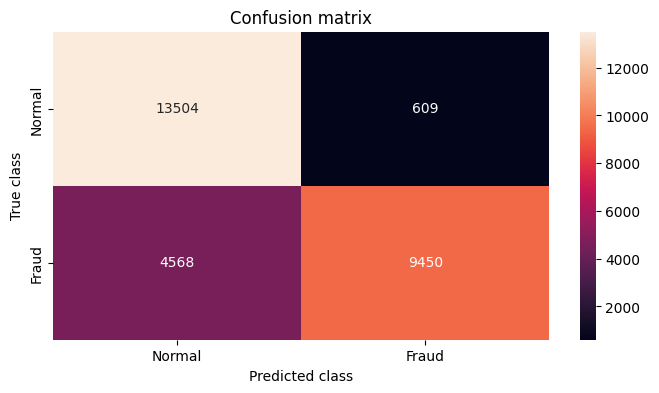

In [7]:
ext=ex_tree(X_train, X_test, y_train, y_test)

Creating DT model ...  ✓ 
The accuracy is 0.9466069460737265
The precision is 0.9402701561840439
The recall is 0.9534170352404052
The F1-Score is 0.9467979597619722


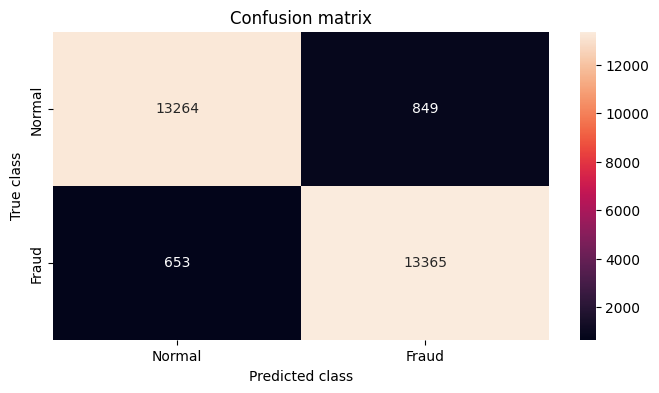

In [4]:
#Decision_Tree
dt=d_tree(X_train, X_test, y_train, y_test)

Creating RF model ...  ✓ 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14113
           1       1.00      0.95      0.97     14018

    accuracy                           0.97     28131
   macro avg       0.97      0.97      0.97     28131
weighted avg       0.97      0.97      0.97     28131



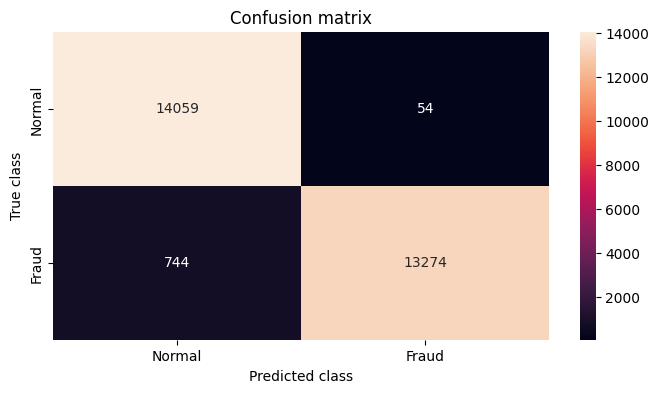

In [5]:
rd=r_forest(X_train, X_test, y_train, y_test)

In [8]:
save_model(ext,"Ex_Trees")

Saving Ex_Trees model ...  ✓ 


In [22]:
test_data=[  4,  2,  23,  1,  410878,  715848.0,  19,  2976,  44,  20339,  3,  1,  621524,  1,  
             384,  4,  0.654861,  0.654861, -1.0, -0.5,  0.959493, -0.978148,  2009,  2011,  2009,  2009 
           ]
to_predict = np.array(test_data).reshape(1,26)

rf_model = pickle.load(open("models/R_forest.pkl","rb"))
rf_model.predict(to_predict) 

array([0], dtype=int64)